## US Baby Names 1880 to Present

Here we'll work through an example of McKinney's, using material we've covered so far. Our goal will be to visualize interesting features inherent in this dataset.  

The data can be downloaded from http://www.ssa.gov/oact/babynames/limits.html, and clicking the National Data link. The zip file unpacks into CSV files named yob*year*.txt for each year. Each row of a YOB file records the first name, gender (F or M), and the number of babies given the name in the year. Here's the head of *yob1012.txt*:

Sophia,F,22158  
Emma,F,20791  
Isabella,F,18931  
Olivia,F,17147  
Ava,F,15418  
Emily,F,13550  

The files contain records for names with at least 5 occurences in each year.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

datadir = 'data/'
imagesdir = 'images/'

# datadir = '/content/drive/My Drive/Courses/672/Notebooks/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Working with a range of years
Next we'll work with the files ranging from 1880 through 2018. We'll need to read these files and combine them into a single DataFrame. So we write a function that returns a DataFrame representing the concatenation of YOB files over a range of years.

In [4]:
def concatenate_YOB_files(yr1, yr2, dir=datadir+'names/'):
    years = range(yr1, yr2+1)
    pieces = []   # dataframes from yr1 through yr2
    columns = ['name', 'sex', 'births']
    for year in years:
        path = dir + 'yob' + str(year) + '.txt'
        frame = pd.read_csv(path, names=columns)
        frame['year'] = year   # add year column
        pieces.append(frame)
    return pd.concat(pieces, ignore_index=True)  # ignore indexes in the component DataFrames

names = concatenate_YOB_files(1880, 2020)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


We can build a DataFrame that shows the total number of births for each year, by sex. To do so, we pivot to obtain a hiearchical dataframe by year and sex, specify that sex becomes the columns, and then use sum to aggregate each group. 

In [5]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births[-10:]

sex,F,M
year,,
2011,1757338,1897353
2012,1759044,1894935
2013,1752384,1889220
2014,1783719,1918065
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527


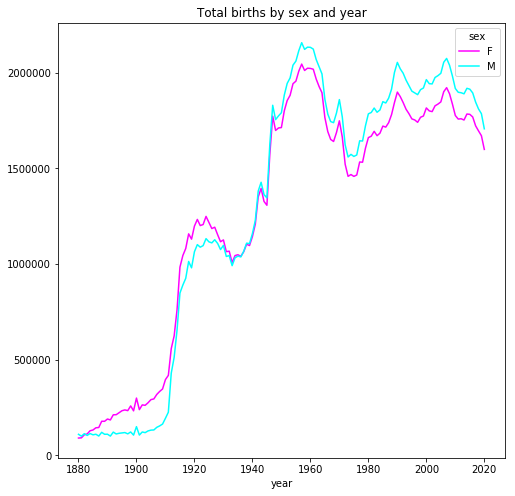

In [6]:
xticks = list(range(1880, 2021, 20))
kwargs = {'figsize': (8,8), 'colormap': 'cool_r'}
total_births.plot(title='Total births by sex and year', xticks=xticks, **kwargs);

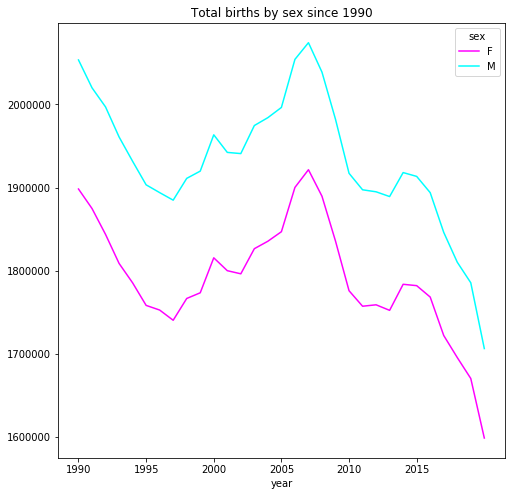

In [7]:
# plotting recent total births
mask = (total_births.index >= 1990)
xticks = list(range(1990, 2020, 5))
total_births[mask].plot(title='Total births by sex since 1990', xticks=xticks, **kwargs);

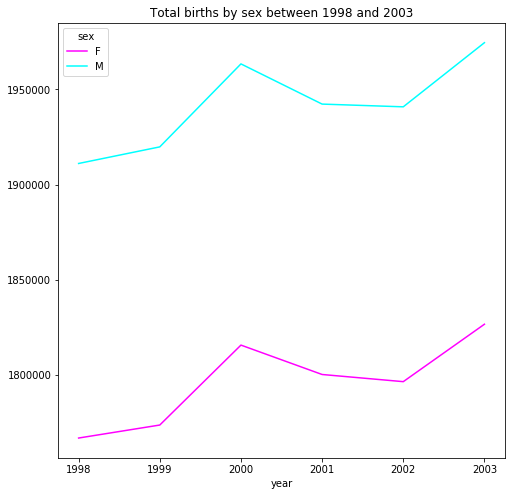

In [8]:
mask = (total_births.index >= 1998) & (total_births.index <= 2003)
total_births[mask].plot(title='Total births by sex between 1998 and 2003', **kwargs)

We add to dataframe *names* a column *prop* which shows the proportion of births for each name, relative to all births for its year and sex.

In [9]:
def addProp(group):
    births = group.births # .astype(float)  # ensure float arithmetic
    group['prop'] = births / births.sum()
    return group

namesG = names.groupby(['year', 'sex']).apply(addProp)
namesG

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [10]:
# As a sanity check, the prop values should sum to 1 for each group
namesG.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
2019  F      1.0
    

In [11]:
np.isclose(namesG.groupby(['year', 'sex']).prop.sum(), 1.0).all()

True

Let's focus on the top *n*=1000 births within each year-sex group.

In [12]:
def getTop(names, n=1000):
    def f(group):
        return group.sort_values(by='births', ascending=False)[:n]
    grouped = names.groupby(['year', 'sex'])
    return grouped.apply(f)

top1000 = getTop(namesG)
print(len(top1000))
print(top1000[:10])
print(top1000[-10:])


281876
                 name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015539
         8     Bertha   F    1320  1880  0.014506
         9      Sarah   F    1288  1880  0.014155
                     name sex  births  year      prop
year sex                                             
2020 M   2007942   Korbyn   M     213  2020  0.000125
         2007943      Wes   M     213  2020  0.000125
         2007945  Jeffery   M     212  2020  0.000124
         2007946    Kalel   M     212  2020  0.000124
         2007944  Eliezer   M     212  2020  0.000124
         200794

In [13]:
# most popular girl and boy name for each year
most_pop = getTop(namesG, 1)
for index, row in most_pop[most_pop.sex == 'F'].iterrows():
  print('{0}:\t{1}'.format(row.year, row['name']))

1880:	Mary
1881:	Mary
1882:	Mary
1883:	Mary
1884:	Mary
1885:	Mary
1886:	Mary
1887:	Mary
1888:	Mary
1889:	Mary
1890:	Mary
1891:	Mary
1892:	Mary
1893:	Mary
1894:	Mary
1895:	Mary
1896:	Mary
1897:	Mary
1898:	Mary
1899:	Mary
1900:	Mary
1901:	Mary
1902:	Mary
1903:	Mary
1904:	Mary
1905:	Mary
1906:	Mary
1907:	Mary
1908:	Mary
1909:	Mary
1910:	Mary
1911:	Mary
1912:	Mary
1913:	Mary
1914:	Mary
1915:	Mary
1916:	Mary
1917:	Mary
1918:	Mary
1919:	Mary
1920:	Mary
1921:	Mary
1922:	Mary
1923:	Mary
1924:	Mary
1925:	Mary
1926:	Mary
1927:	Mary
1928:	Mary
1929:	Mary
1930:	Mary
1931:	Mary
1932:	Mary
1933:	Mary
1934:	Mary
1935:	Mary
1936:	Mary
1937:	Mary
1938:	Mary
1939:	Mary
1940:	Mary
1941:	Mary
1942:	Mary
1943:	Mary
1944:	Mary
1945:	Mary
1946:	Mary
1947:	Linda
1948:	Linda
1949:	Linda
1950:	Linda
1951:	Linda
1952:	Linda
1953:	Mary
1954:	Mary
1955:	Mary
1956:	Mary
1957:	Mary
1958:	Mary
1959:	Mary
1960:	Mary
1961:	Mary
1962:	Lisa
1963:	Lisa
1964:	Lisa
1965:	Lisa
1966:	Lisa
1967:	Lisa
1968:	Lisa
1969:	Lisa
1970

In [14]:
# most popular girl and boy name for each year
# another approach
most_pop = getTop(namesG, 1)
for i in range(0, len(most_pop), 2):
  r0 = most_pop.iloc[i]
  r1 = most_pop.iloc[i+1]
  print('{0}:\t{1:<12}{2}'.format(r0.year, r0['name'], r1['name']))

1880:	Mary        John
1881:	Mary        John
1882:	Mary        John
1883:	Mary        John
1884:	Mary        John
1885:	Mary        John
1886:	Mary        John
1887:	Mary        John
1888:	Mary        John
1889:	Mary        John
1890:	Mary        John
1891:	Mary        John
1892:	Mary        John
1893:	Mary        John
1894:	Mary        John
1895:	Mary        John
1896:	Mary        John
1897:	Mary        John
1898:	Mary        John
1899:	Mary        John
1900:	Mary        John
1901:	Mary        John
1902:	Mary        John
1903:	Mary        John
1904:	Mary        John
1905:	Mary        John
1906:	Mary        John
1907:	Mary        John
1908:	Mary        John
1909:	Mary        John
1910:	Mary        John
1911:	Mary        John
1912:	Mary        John
1913:	Mary        John
1914:	Mary        John
1915:	Mary        John
1916:	Mary        John
1917:	Mary        John
1918:	Mary        John
1919:	Mary        John
1920:	Mary        John
1921:	Mary        John
1922:	Mary        John
1923:	Mary 

In [27]:
# most popular female names in given year
year = 1850
top1000[top1000['year'] == year][top1000['sex'] == 'F'][:20]

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,,,name,sex,births,year,prop
year,sex,,,,,,


In [28]:
# most popular female names in given year
# another approach
year = 1880
top1000.loc[(year, 'F')][:20]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


To plot number of births by name over time, we pivot on *top1000*, so that the rows are indexed by year and the columns by name. 

In [29]:
# drop the year and sex columns from top1000 so we don't get warning
top1000 = top1000.drop(['year', 'sex'], axis=1)
print(top1000[-10:])

                     name  births      prop
year sex                                   
2020 M   2007942   Korbyn     213  0.000125
         2007943      Wes     213  0.000125
         2007945  Jeffery     212  0.000124
         2007946    Kalel     212  0.000124
         2007944  Eliezer     212  0.000124
         2007949   Willie     211  0.000124
         2007947   Kylian     211  0.000124
         2007948   Turner     211  0.000124
         2007950  Rogelio     210  0.000123
         2007951  Ephraim     209  0.000122


In [30]:
# most popular names in year by sex
year = 2020
top1000.loc[(year, 'M')][:10]

,name,births,prop
2006952,Liam,19659,0.011521
2006953,Noah,18252,0.010696
2006954,Oliver,14147,0.008290
2006955,Elijah,13034,0.007638
2006956,William,12541,0.007349
2006957,James,12250,0.007179
2006958,Benjamin,12136,0.007112
2006959,Lucas,11281,0.006611
2006960,Henry,10705,0.006273
2006961,Alexander,10151,0.005949


In [31]:
totalBirths1000 = top1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)
totalBirths1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1880 to 2020
Columns: 7248 entries, Aaden to Zyon
dtypes: float64(7248)
memory usage: 7.8 MB


In [63]:
print(totalBirths1000[:5])
print(totalBirths1000[-5:])

name  Aaden  Aadhya  Aaliyah  Aanya  Aarav  ...  Zona  Zora  Zula  Zuri  Zyaire
year                                        ...                                
1880    NaN     NaN      NaN    NaN    NaN  ...   8.0  28.0  27.0   NaN     NaN
1881    NaN     NaN      NaN    NaN    NaN  ...   9.0  21.0  27.0   NaN     NaN
1882    NaN     NaN      NaN    NaN    NaN  ...  17.0  32.0  21.0   NaN     NaN
1883    NaN     NaN      NaN    NaN    NaN  ...  11.0  35.0  25.0   NaN     NaN
1884    NaN     NaN      NaN    NaN    NaN  ...   8.0  58.0  27.0   NaN     NaN

[5 rows x 7172 columns]
name  Aaden  Aadhya  Aaliyah  Aanya  Aarav  ...  Zona   Zora  Zula    Zuri  Zyaire
year                                        ...                                   
2014  237.0     NaN   4871.0  266.0  531.0  ...   NaN    NaN   NaN   664.0     NaN
2015  296.0     NaN   4836.0    NaN  539.0  ...   NaN    NaN   NaN   709.0     NaN
2016    NaN   284.0   4641.0    NaN  519.0  ...   NaN    NaN   NaN   889.0   248.0


We can make separate plots for the columns we pick out by name.

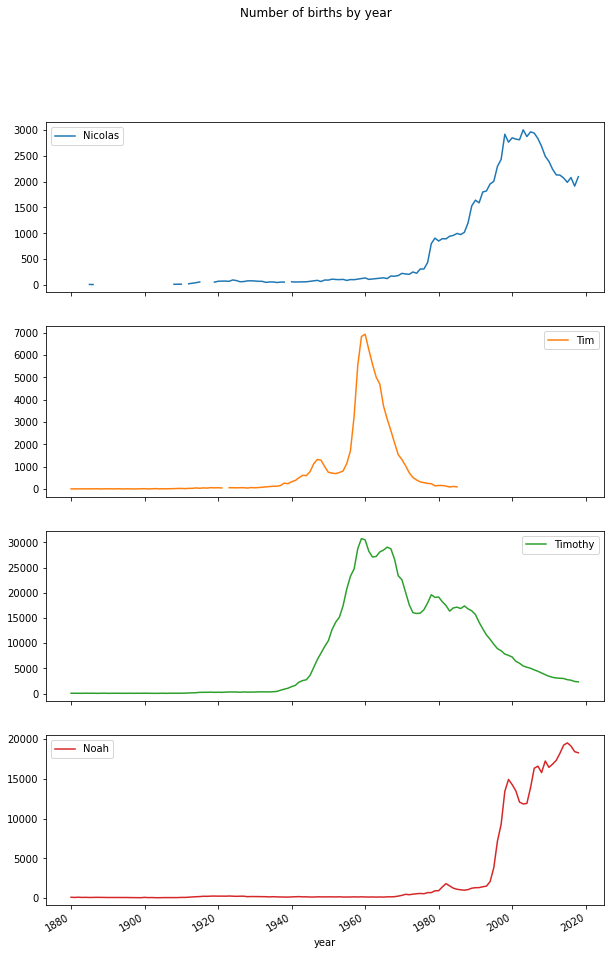

In [74]:
def plotByName(data, names, subplots=True, width=8, **kwargs):
    rcds = data[names]
    if subplots:
        height = len(names) * 4.0
    else:
        height = width
    rcds.plot(subplots=subplots, grid=False, figsize=(width, height), title='Number of births by year', **kwargs)

xticks = list(range(1880, 2021, 20))
plotByName(totalBirths1000, ['Nicolas', 'Tim', 'Timothy', 'Noah'], xticks=xticks, width=10)

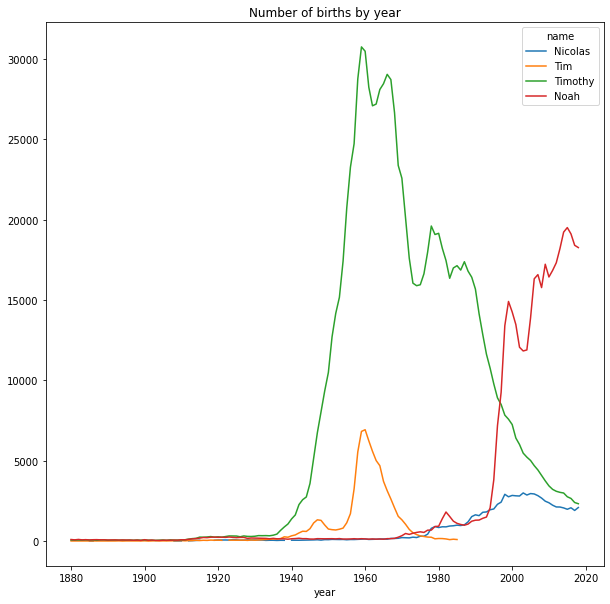

In [71]:
plotByName(totalBirths1000, ['Nicolas', 'Tim', 'Timothy', 'Noah'], subplots=False, width=10)

We can also plot proportion of name occurrences by year and sex group.

In [75]:
totalBirths1000prop = top1000.pivot_table(values='prop', index='year', columns='name', aggfunc=sum)
print(totalBirths1000prop['Elisa'])

year
1880    0.000055
1881         NaN
1882    0.000074
1883    0.000071
1884    0.000078
          ...   
2014    0.000348
2015    0.000369
2016    0.000358
2017    0.000358
2018    0.000407
Name: Elisa, Length: 139, dtype: float64


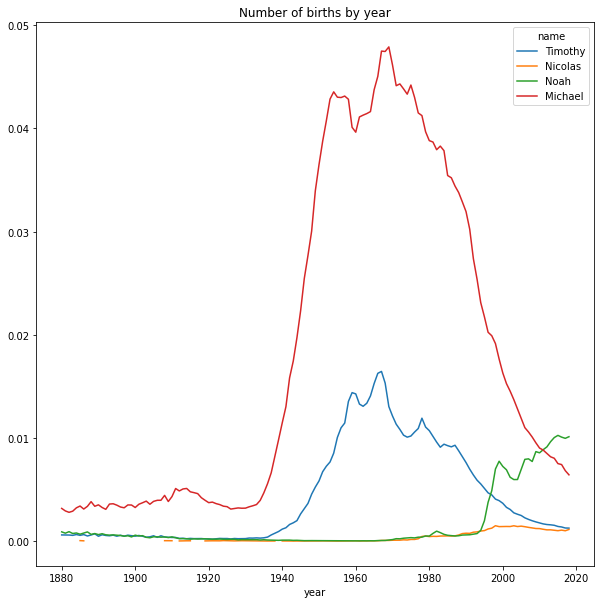

In [76]:
plotByName(totalBirths1000prop, names=['Timothy', 'Nicolas', 'Noah', 'Michael'], subplots=False, width=10)

It's hypothesized that the diversity of names has increased since 1880. One measure is to compute the proportion of total names that is represented by the 1000 most popular names, by year and sex. The calculation below indicates that name diversity has increased over the years, especially for female names.

In [77]:
table = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
print(table[:10])
print(table[-10:])

sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
1885  0.992251  0.995501
1886  0.989504  0.995035
1887  0.988279  0.996697
1888  0.984241  0.992429
1889  0.984061  0.994981
sex          F         M
year                    
2009  0.737205  0.845222
2010  0.736501  0.842828
2011  0.737130  0.842815
2012  0.736115  0.841218
2013  0.740052  0.843228
2014  0.743496  0.842643
2015  0.742641  0.841214
2016  0.742043  0.837362
2017  0.740825  0.833610
2018  0.741777  0.829725


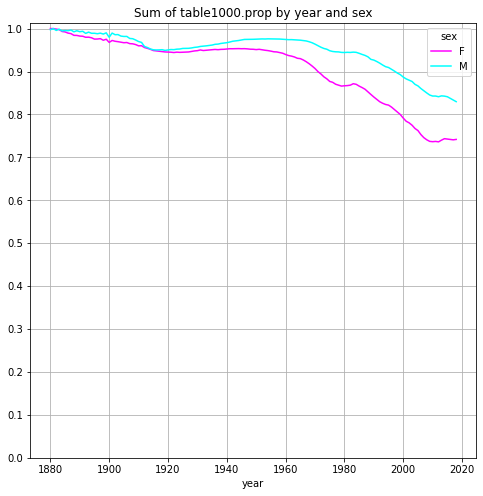

In [85]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1, 11), xticks=range(1880, 2021, 20), grid=True, **kwargs)